In [1]:
include("cutoff.jl")

hitting_times (generic function with 1 method)

Taking Step 1 of 500 steps
Taking Step 2 of 500 steps
Taking Step 3 of 500 steps
Taking Step 4 of 500 steps
Taking Step 5 of 500 steps
Taking Step 6 of 500 steps
Taking Step 7 of 500 steps
Taking Step 8 of 500 steps
Taking Step 9 of 500 steps
Taking Step 10 of 500 steps
Taking Step 11 of 500 steps
Taking Step 12 of 500 steps
Taking Step 13 of 500 steps
Taking Step 14 of 500 steps
Taking Step 15 of 500 steps
Taking Step 16 of 500 steps
Taking Step 17 of 500 steps
Taking Step 18 of 500 steps
Taking Step 19 of 500 steps
Taking Step 20 of 500 steps
Taking Step 21 of 500 steps
Taking Step 22 of 500 steps
Taking Step 23 of 500 steps
Taking Step 24 of 500 steps
Taking Step 25 of 500 steps
Taking Step 26 of 500 steps
Taking Step 27 of 500 steps
Taking Step 28 of 500 steps
Taking Step 29 of 500 steps
Taking Step 30 of 500 steps
Taking Step 31 of 500 steps
Taking Step 32 of 500 steps
Taking Step 33 of 500 steps
Taking Step 34 of 500 steps
Taking Step 35 of 500 steps
Taking Step 36 of 500 steps
T

Taking Step 288 of 500 steps
Taking Step 289 of 500 steps
Taking Step 290 of 500 steps
Taking Step 291 of 500 steps
Taking Step 292 of 500 steps
Taking Step 293 of 500 steps
Taking Step 294 of 500 steps
Taking Step 295 of 500 steps
Taking Step 296 of 500 steps
Taking Step 297 of 500 steps
Taking Step 298 of 500 steps
Taking Step 299 of 500 steps
Taking Step 300 of 500 steps
Taking Step 301 of 500 steps
Taking Step 302 of 500 steps
Taking Step 303 of 500 steps
Taking Step 304 of 500 steps
Taking Step 305 of 500 steps
Taking Step 306 of 500 steps
Taking Step 307 of 500 steps
Taking Step 308 of 500 steps
Taking Step 309 of 500 steps
Taking Step 310 of 500 steps
Taking Step 311 of 500 steps
Taking Step 312 of 500 steps
Taking Step 313 of 500 steps
Taking Step 314 of 500 steps
Taking Step 315 of 500 steps
Taking Step 316 of 500 steps
Taking Step 317 of 500 steps
Taking Step 318 of 500 steps
Taking Step 319 of 500 steps
Taking Step 320 of 500 steps
Taking Step 321 of 500 steps
Taking Step 32

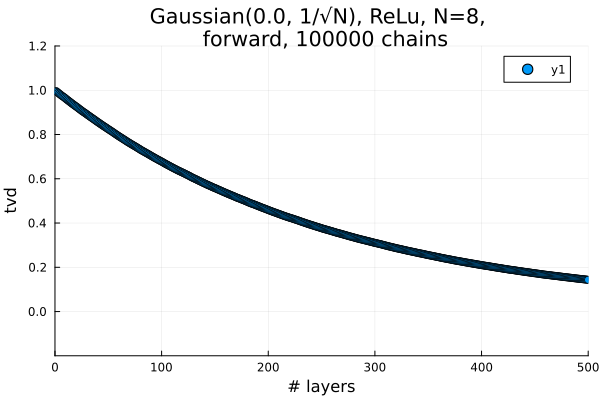

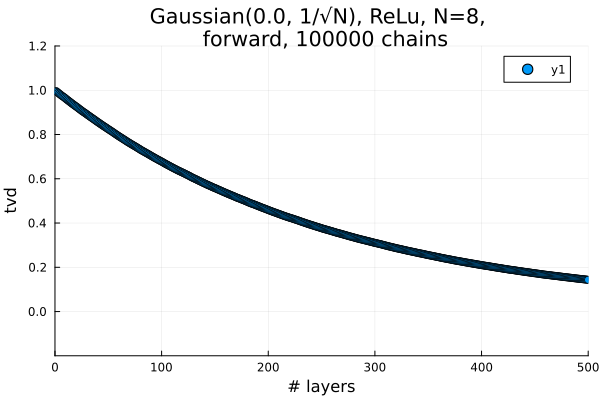

In [28]:
N = 8
X₀ = rand(Uniform(-1, 1), N)
num_chains = 100000
# Dist = Uniform(-1/√N, 1/√N)
# Dist = Normal(0.0, 1)
Dist = Normal(0.0, 1/√N)
activation = σ
# activation = tanh
grid_size = 0.0000001
num_steps = 500
forward = true
store_steps = false

Exp = Experiment(X₀, N, num_chains, Dist, activation, grid_size, num_steps, forward, store_steps)
Results = ExperimentResults([], [], [])
run_and_plot_tvds(Exp, Results, verbose=true, save=false)

In [ ]:
grid_sizes = [0.001, 0.0001, 0.00001, 0.000001, 0.0000001, 0.00000001, 0.000000001]
p = plot()

for grid_size in grid_sizes
    println(grid_size)
    Exp = Experiment(X₀, N, num_chains, Dist, activation, grid_size, num_steps, forward, store_steps)

    run_chain(Exp, Results, verbose=false)
    diststr_greek, diststr_nongreek, actstr, dynamicsstr = get_plotting_strs(Exp)

    if activation == σ
        title = "$diststr_greek, $actstr, N=$N, \n $dynamicsstr, $num_chains chains"
    elseif activation == tanh
        title = "$diststr_greek, $actstr, N=$N, \n $dynamicsstr, $num_chains chains"
    end

    plot!(Results.tvds,
         title=title,
         xlabel="# layers",
         ylabel="tvd",
         xlim=(0, num_steps),
         ylim=(-0.2, 1.2),
         yticks = 0:0.2:1.2,
         seriestype=:scatter,
        label="$grid_size"
    )
end

display(p)

In [24]:
diststr_greek, diststr_nongreek, actstr, dynamicsstr = get_plotting_strs(Exp)

savefig(p, "imgs/tvds/$diststr_nongreek $actstr $dynamicsstr N=$N.png")

"/Users/bhushansuwal/Desktop/code/cutoff/imgs/tvds/Uniform(-sqrtN, sqrtN) TanH forward N=5.png"